# Trabajo Grupal - grupo 1

### Integrantes:


*   Almeida Stefany
*   Córdova Daniel
*   Drouet Ariana


In [ ]:
# Intalacion de programas
pip install biopython

In [ ]:
pip install dna_features_viewer

In [ ]:
pip install matplotlib

In [ ]:
# Importar paquetes
from Bio.Seq import Seq

In [ ]:
import os
import sys

from urllib.request import urlretrieve

import Bio
from Bio.SeqUtils import gc_fraction
from Bio.Blast import NCBIWWW

In [ ]:
from Bio.Data import CodonTable


In [ ]:
# Creacion de graficos
from dna_features_viewer import GraphicFeature, GraphicRecord

(<Axes: >,
 ({GF(Promotor1, 90-120 (1)): 0,
   GF(Gen1, 200-550 (1)): 1.0,
   GF(Gen2, 500-874 (-1)): 0,
   GF(Promotor2, 900-920 (-1)): 0},
  {GF(Promotor1, 90-120 (1)): {'feature_y': 0, 'annotation_y': 2.0},
   GF(Promotor2, 900-920 (-1)): {'feature_y': 0, 'annotation_y': 1.0}}))

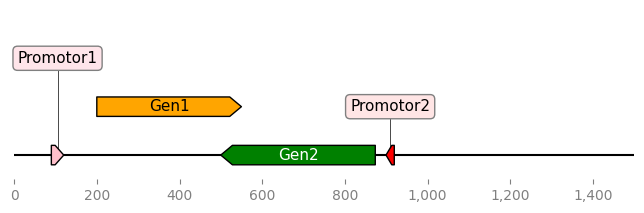

In [ ]:
caracts=[GraphicFeature(start=90, end=120, strand=+1,color="pink", label="Promotor1"),
        GraphicFeature(start=200, end=550, strand=+1,color="orange", label="Gen1"),
        GraphicFeature(start=500, end=874, strand=-1,color="green", label="Gen2"),
        GraphicFeature(start=900, end=920, strand=-1,color="red", label="Promotor2")]

graphic=GraphicRecord(sequence_length=1500, features=caracts)

graphic.plot()

In [ ]:
from dna_features_viewer import CircularGraphicRecord


(<Axes: >,
 ({GF(Promotor1, 90-120 (1)): 0,
   GF(Gen1, 200-550 (1)): 1.0,
   GF(Gen2, 500-874 (-1)): 0,
   GF(Promotor2, 900-920 (-1)): 0},
  {GF(Gen2, 500-874 (-1)): {'feature_y': -1.9648332167413067,
    'annotation_y': 0.7},
   GF(Gen1, 200-550 (1)): {'feature_y': -0.9974867277145366,
    'annotation_y': 0.45},
   GF(Promotor1, 90-120 (1)): {'feature_y': -0.09428318263003377,
    'annotation_y': 0.45},
   GF(Promotor2, 900-920 (-1)): {'feature_y': -1.7849926664121722,
    'annotation_y': 0.45}}))

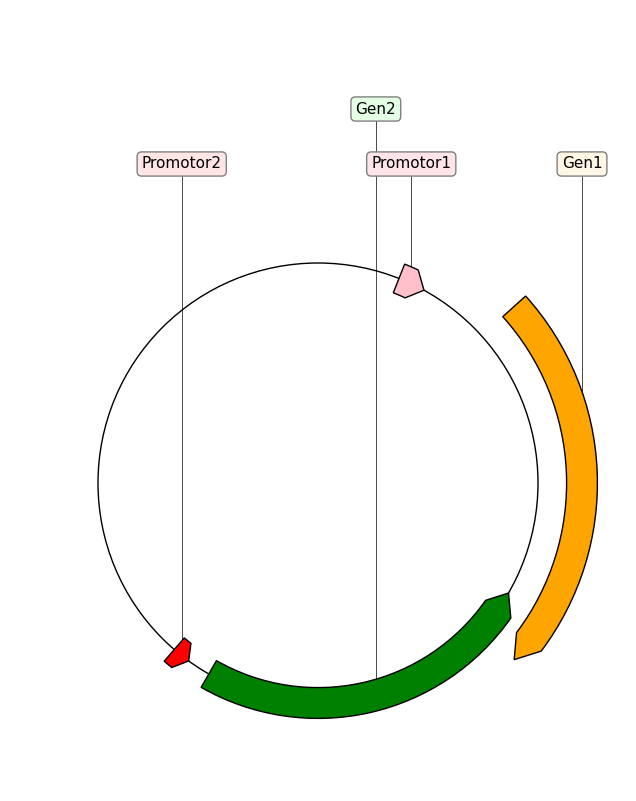

In [ ]:
graphic1=CircularGraphicRecord(sequence_length=1500, features=caracts)
graphic1.plot()

## Creación de un plásmido tipo pET

In [ ]:
# Descarga de plasmidos de la base de  datos NCBI
from Bio import SeqIO, SearchIO, Entrez

In [ ]:
#Registro en Entrez

Entrez.email="salmeidam1@est.ups.edu.ec"
file=Entrez.esearch(db="nucleotide",term="cloning vector pET", retmax="30")

record=Entrez.read(file)
print(record)
#Se eligio el iD: 2067515819

In [ ]:
# Busqueda del código con el identificador

file=Entrez.efetch(db="nucleotide", id="2067515819", rettype="gb", retmode="text")

record=SeqIO.read(file, "genbank")
print(record)

In [ ]:
#Secuencia completa

print(record.seq)

In [ ]:
# Graficos
import matplotlib.pyplot as plt
import numpy as np
from dna_features_viewer import BiopythonTranslator

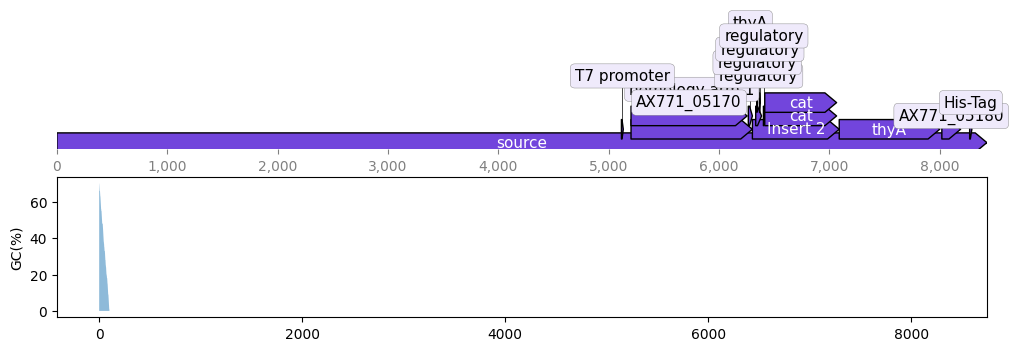

In [ ]:
# Creacion de la figura

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(12,4))

grafico=BiopythonTranslator().translate_record(record)
grafico.plot(ax=ax1)

y=[]

for i in range (0, len(grafico.sequence)-100):
    count=0
    seq=grafico.sequence[i:1+100]
    for n in seq:
        if n in "GC":
            count += 1

    y.append(count)

x=np.arange(len(grafico.sequence)-100)

ax2.fill_between(x,y,alpha=0.5)
ax2.set_ylabel("GC(%)")

plt.show()